# Biomedical Image Segmentation with U-Net

Lien de Dataset :
    https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2025-11-03 18:02:22.272912: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
folder_paths = ["Cancer/malignant", "Cancer/benign"] # Paths to the 2 folders

size = 128 # Input size: 128x128

images = [] # Empty list to store the original images in
masks = [] # Empty list to store the masks in

found_mask = False # This flag helps us handle multiple masks for the same image
# Loop through both folders
for folder_path in folder_paths:
    # Loop through all files in the current folder (sorted for consistency)
    for file_path in sorted(glob(folder_path + "/*")):
        # Load and resize the image
        img = cv2.imread(file_path)
        img = cv2.resize(img, (size, size)) # Resize image to 128×128
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Convert RGB to grayscale
        img = img / 255.0 # Normalize to [0,1]

        if "mask" in file_path: # Checks if the filename contains "mask"
            if found_mask:
                # Combine with the previous mask
                masks[-1] += img
                # Ensure binary output (0 or 1)
                masks[-1] = np.where(masks[-1] > 0.5, 1.0, 0.0)
            else:
                masks.append(img) # Adds the first mask to the list
                found_mask = True
        else:
            images.append(img) # Adds original image to the list
            found_mask = False

# Convert lists to NumPy arrays
X = np.array(images) # Create an array of all original images
y = np.array(masks) # Create an array of all masked imaged (Ground truth)

X = np.expand_dims(X, -1)
y = np.expand_dims(y, -1)

print(f"X shape: {X.shape} | y shape: {y.shape}")
# Split images into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)


X shape: (647, 128, 128, 1) | y shape: (647, 128, 128, 1)


### Ajouter du code pour visualiser les cartes des caractéristiques (feature maps) de chaque couche dans le modèle U-Net

Test image shape: (1, 128, 128, 1)


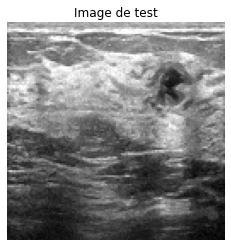

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


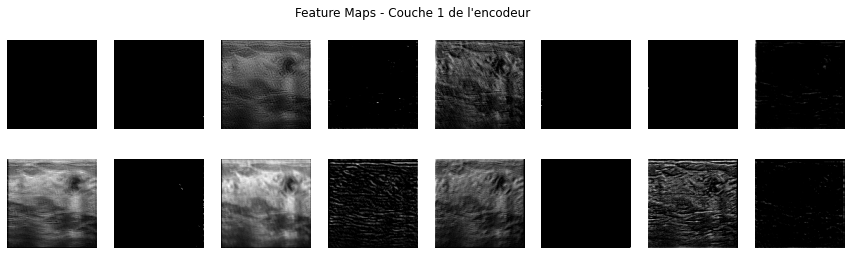

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


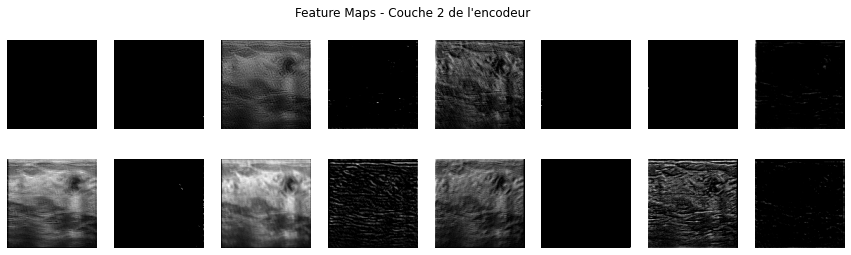

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


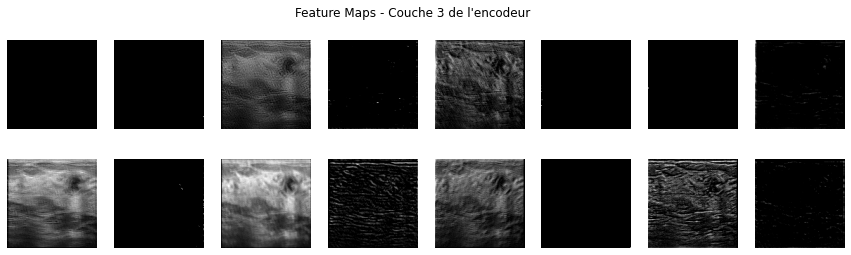

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


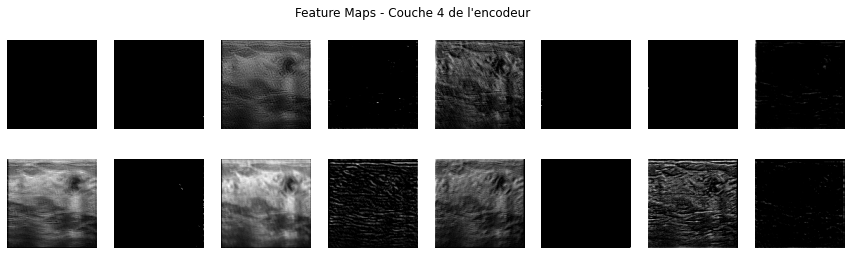

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


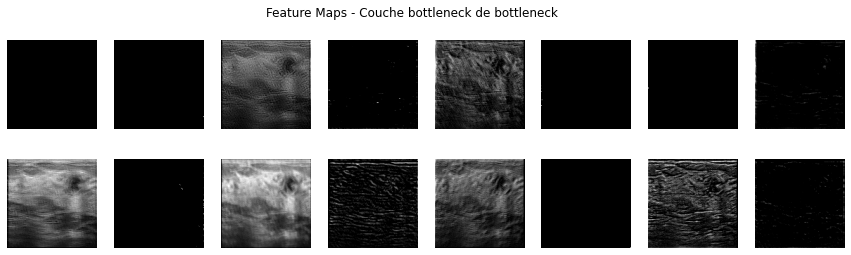

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


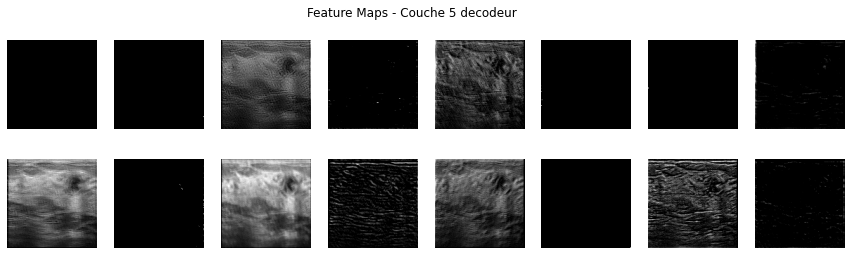

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


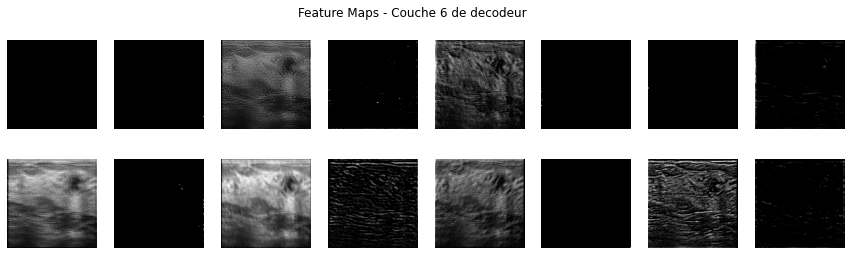

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


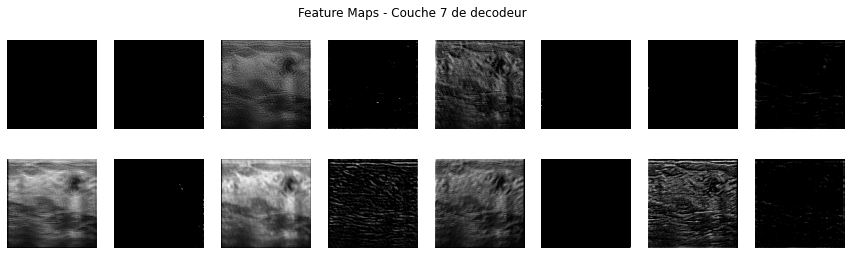

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


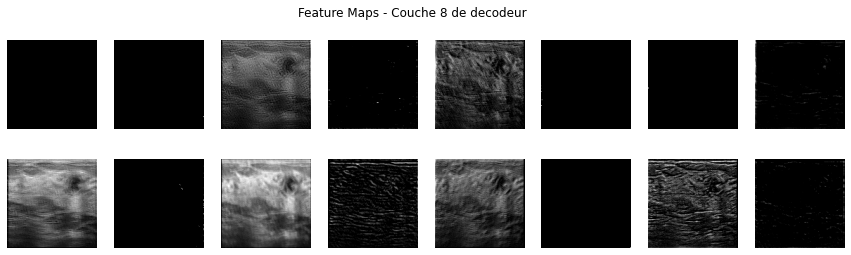

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 512) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8,      │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 16, 16,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_transpose

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Build the U-Net
input_layer = Input(shape=(size, size, 1))
conv1 = Conv2D(64, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(input_layer)
conv1 = Conv2D(64, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

test_image = X_val[10]                     # Extraire la 1ère image
test_mask = y_val[10]                      # Masque correspondant (optionnel pour affichage/évaluation)

# Ajouter la dimension batch pour qu'elle soit compatible avec le modèle
test_image = np.expand_dims(test_image, axis=0)  # Devient (1, 128, 128, 1)

print(f"Test image shape: {test_image.shape}")
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title("Image de test")
plt.axis('off')
plt.show()


# Créer un modèle qui donne la sortie de conv1
layer1_model = Model(inputs=input_layer, outputs=conv1)

# Obtenir l’activation de cette couche
layer1_feature_maps = layer1_model.predict(test_image)

# Visualiser les premières cartes de caractéristiques
num_features = min(16, layer1_feature_maps.shape[-1])  # Nombre de cartes à afficher (max 16)
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.imshow(layer1_feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.suptitle("Feature Maps - Couche 1 de l'encodeur")
plt.show()

# Second encoder block
conv2 = Conv2D(128, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(pool1)
conv2 = Conv2D(128, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

# Visualisation des cartes de caractéristiques de la couche 2 de l'encodeur
layer2_model = Model(inputs=input_layer, outputs=conv2)
layer2_feature_maps = layer2_model.predict(test_image)
# Visualiser les premières cartes de caractéristiques
num_features = min(16, layer1_feature_maps.shape[-1])  # Nombre de cartes à afficher (max 16)
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.imshow(layer1_feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.suptitle("Feature Maps - Couche 2 de l'encodeur")
plt.show()

# Third encoder block
conv3 = Conv2D(256, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(pool2)
conv3 = Conv2D(256, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)

# Visualisation des cartes de caractéristiques de la couche 2 de l'encodeur
layer2_model = Model(inputs=input_layer, outputs=conv3)
layer2_feature_maps = layer2_model.predict(test_image)
# Visualiser les premières cartes de caractéristiques
num_features = min(16, layer1_feature_maps.shape[-1])  # Nombre de cartes à afficher (max 16)
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.imshow(layer1_feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.suptitle("Feature Maps - Couche 3 de l'encodeur")
plt.show()

# Fourth encoder block
conv4 = Conv2D(512, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(pool3)
conv4 = Conv2D(512, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(conv4)
pool4 = MaxPooling2D((2, 2))(conv4)

# Visualisation des cartes de caractéristiques de la couche 2 de l'encodeur
layer2_model = Model(inputs=input_layer, outputs=conv4)
layer2_feature_maps = layer2_model.predict(test_image)
# Visualiser les premières cartes de caractéristiques
num_features = min(16, layer1_feature_maps.shape[-1])  # Nombre de cartes à afficher (max 16)
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.imshow(layer1_feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.suptitle("Feature Maps - Couche 4 de l'encodeur")
plt.show()

# --- Bottleneck ---
bottleneck = Conv2D(1024, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(pool4)
bottleneck = Conv2D(1024, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(bottleneck)

# Visualisation des cartes de caractéristiques de la couche 2 de l'encodeur
layer2_model = Model(inputs=input_layer, outputs=bottleneck)
layer2_feature_maps = layer2_model.predict(test_image)
# Visualiser les premières cartes de caractéristiques
num_features = min(16, layer1_feature_maps.shape[-1])  # Nombre de cartes à afficher (max 16)
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.imshow(layer1_feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.suptitle("Feature Maps - Couche bottleneck de bottleneck")
plt.show()

# First decoder block
upconv1 = Conv2DTranspose(512, (2, 2), strides=2, padding="same",kernel_initializer="he_normal")(bottleneck)
concat1 = concatenate([upconv1, conv4])
conv5 = Conv2D(512, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(concat1)
conv5 = Conv2D(512, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(conv5)

# Visualisation des cartes de caractéristiques de la couche 2 de l'encodeur
layer2_model = Model(inputs=input_layer, outputs=conv5)
layer2_feature_maps = layer2_model.predict(test_image)
# Visualiser les premières cartes de caractéristiques
num_features = min(16, layer1_feature_maps.shape[-1])  # Nombre de cartes à afficher (max 16)
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.imshow(layer1_feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.suptitle("Feature Maps - Couche 5 decodeur")
plt.show()


# Second decoder block
upconv2 = Conv2DTranspose(256, (2, 2), strides=2, padding="same",kernel_initializer="he_normal")(conv5)
concat2 = concatenate([upconv2, conv3])
conv6 = Conv2D(256, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(concat2)
conv6 = Conv2D(256, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(conv6)

# Visualisation des cartes de caractéristiques de la couche 2 de l'encodeur
layer2_model = Model(inputs=input_layer, outputs=conv6)
layer2_feature_maps = layer2_model.predict(test_image)
# Visualiser les premières cartes de caractéristiques
num_features = min(16, layer1_feature_maps.shape[-1])  # Nombre de cartes à afficher (max 16)
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.imshow(layer1_feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.suptitle("Feature Maps - Couche 6 de decodeur")
plt.show()

# Third decoder block
upconv3 = Conv2DTranspose(128, (2, 2), strides=2, padding="same",kernel_initializer="he_normal")(conv6)
concat3 = concatenate([upconv3, conv2])
conv7 = Conv2D(128, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(concat3)
conv7 = Conv2D(128, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(conv7)

# Visualisation des cartes de caractéristiques de la couche 2 de l'encodeur
layer2_model = Model(inputs=input_layer, outputs=conv7)
layer2_feature_maps = layer2_model.predict(test_image)
# Visualiser les premières cartes de caractéristiques
num_features = min(16, layer1_feature_maps.shape[-1])  # Nombre de cartes à afficher (max 16)
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.imshow(layer1_feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.suptitle("Feature Maps - Couche 7 de decodeur")
plt.show()

# Fourth decoder block
upconv4 = Conv2DTranspose(64, (2, 2), strides=2, padding="same",kernel_initializer="he_normal")(conv7)
concat4 = concatenate([upconv4, conv1])
conv8 = Conv2D(64, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(concat4)
conv8 = Conv2D(64, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(conv8)

# Visualisation des cartes de caractéristiques de la couche 2 de l'encodeur
layer2_model = Model(inputs=input_layer, outputs=conv8)
layer2_feature_maps = layer2_model.predict(test_image)
# Visualiser les premières cartes de caractéristiques
num_features = min(16, layer1_feature_maps.shape[-1])  # Nombre de cartes à afficher (max 16)
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    if i < num_features:
        ax.imshow(layer1_feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.suptitle("Feature Maps - Couche 8 de decodeur")
plt.show()

# --- Output layer ---
output_layer = Conv2D(1, (1, 1), activation="sigmoid", padding="same")(conv8)


# --- Model creation ---
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()


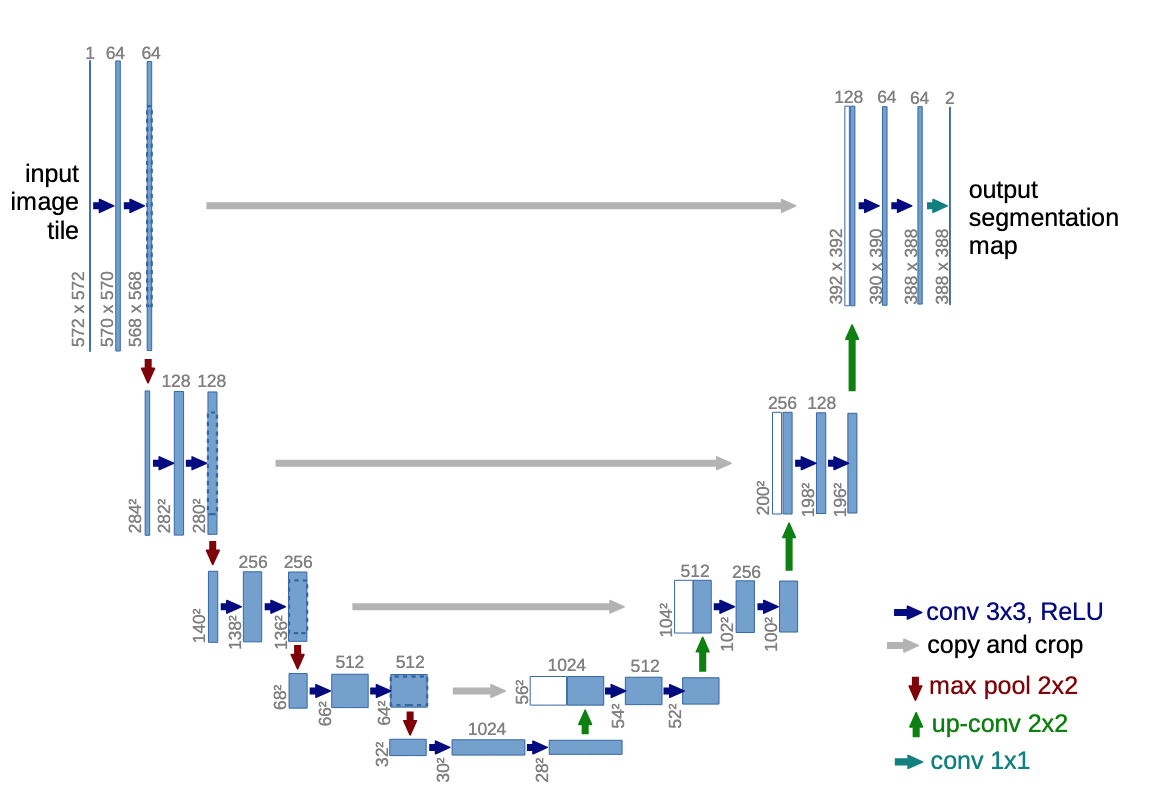

In [4]:
# Compile and train the model
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs = 40, validation_data = (X_val,y_val),verbose=1)


Epoch 1/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 324s 17s/step - accuracy: 0.9012 - loss: 23.5580 - val_accuracy: 0.8962 - val_loss: 0.3701
Epoch 2/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 576s 30s/step - accuracy: 0.8582 - loss: 0.5436 - val_accuracy: 0.8948 - val_loss: 0.3591
Epoch 3/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 535s 28s/step - accuracy: 0.9031 - loss: 0.3364 - val_accuracy: 0.8948 - val_loss: 0.2821
Epoch 4/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 513s 27s/step - accuracy: 0.9048 - loss: 0.2658 - val_accuracy: 0.8948 - val_loss: 0.2558
Epoch 5/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 377s 20s/step - accuracy: 0.9068 - loss: 0.2563 - val_accuracy: 0.8959 - val_loss: 0.2297
Epoch 6/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 382s 20s/step - accuracy: 0.9085 - loss: 0.2192 - val_accuracy: 0.9151 - val_loss: 0.2013
Epoch 7/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 366s 19s/step - accuracy: 0.9176 - loss: 0.2098 - val_accuracy: 0.9279 - val_loss: 0.1865
Epoch 8/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 4052s 224s/step - accuracy: 0.9203 - loss: 0.2020 - val_accuracy:

In [5]:
# Compute IoU
from sklearn.metrics import jaccard_score
# Compute predicted mask
pred=model.predict(X_val,verbose=1)
pred = (pred > 0.5).astype(int) # binarize
y_true = y_val.astype(int)
# Compute IoU based on flatten predictions and ground truths
iou = jaccard_score(pred.flatten(), y_true.flatten())
print(f" IoU (Jaccard Score): {iou:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
 IoU (Jaccard Score): 0.7074


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


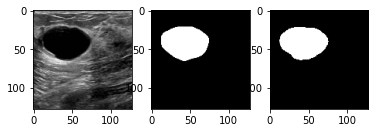

In [6]:
# Plot
i=6 # Try other values
plt.subplot(1, 3, 1)
plt.imshow(X_val[i],cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(y_val[i],cmap="gray")
plt.subplot(1, 3, 3)
pred=model.predict(np.expand_dims(X_val[i], axis=0),verbose=1)[0]
pred = (pred > 0.5) # binarize
plt.imshow(pred,cmap="gray")

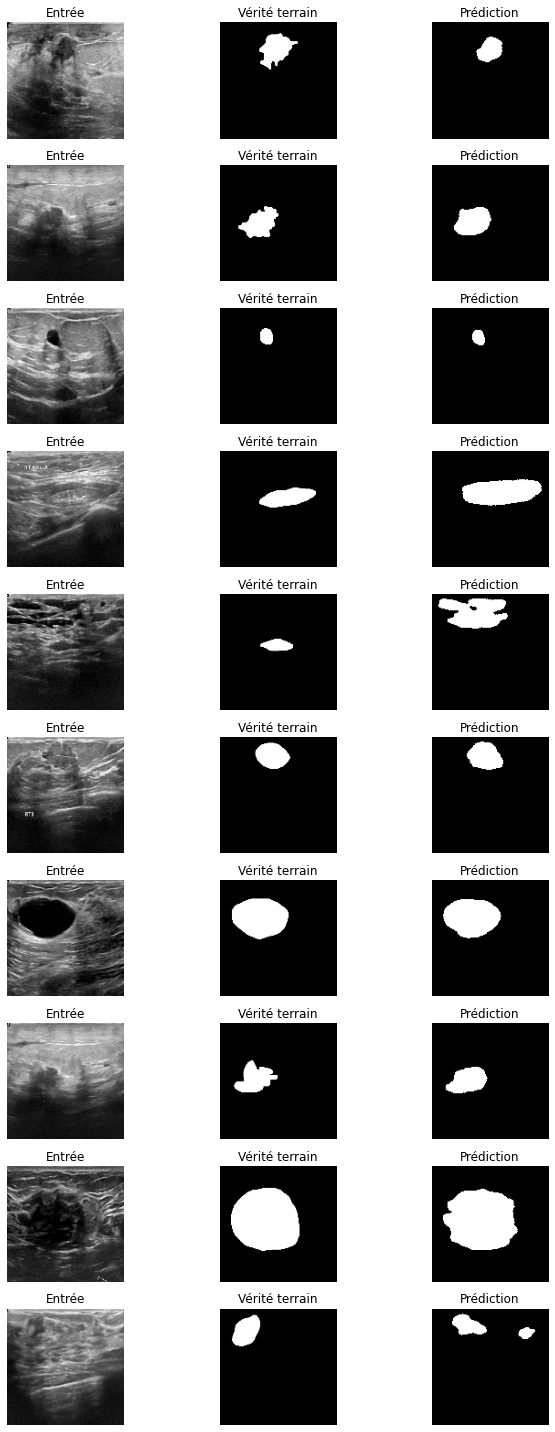

In [17]:
n = 10
plt.figure(figsize=(10, n * 2))

for i in range(n):
    # Image d'entrée
    plt.subplot(n, 3, 3*i + 1)
    plt.imshow(X_val[i], cmap='gray')
    plt.title("Entrée")
    plt.axis('off')
    
    # Masque réel
    plt.subplot(n, 3, 3*i + 2)
    plt.imshow(y_val[i], cmap='gray')
    plt.title("Vérité terrain")
    plt.axis('off')
    
    # Prédiction
    pred = model.predict(np.expand_dims(X_val[i], axis=0), verbose=0)[0]
    pred = (pred > 0.5)
    
    plt.subplot(n, 3, 3*i + 3)
    plt.imshow(pred, cmap='gray')
    plt.title("Prédiction")
    plt.axis('off')

plt.tight_layout()
plt.show()